In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

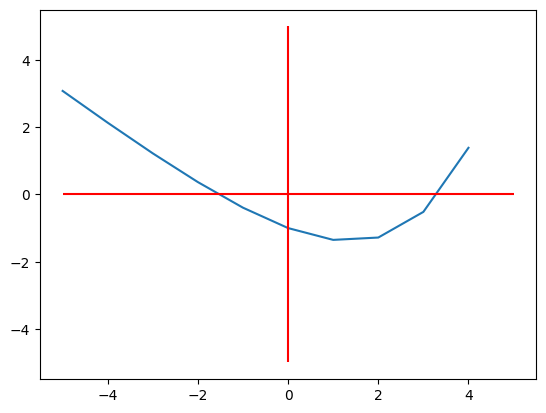

In [3]:
f = lambda x: np.exp(0.5*x) - x -2
f_x = [f(x) for x in np.arange(-5, 5, 1)]
plt.plot(np.arange(-5, 5, 1), f_x)
plt.hlines(0, -5, 5, color='r')
plt.vlines(0, -5, 5, color='r')

In [11]:
def fixed_point(g, x0, tol=1e-4, max_iters=100):

    x_prev = x0
    for i in range(1, max_iters + 1):
        x_next = g(x_prev)
        if abs((x_next - x_prev)/x_prev) < tol:
            return x_next, i
        x_prev = x_next
    raise ValueError("Fixed-point iteration did not converge within the maximum iterations")

# Define the target function f(x) = e^(0.5*x) - x - 2
f = lambda x: np.exp(0.5 * x) - x - 2

# Two rearrangements:
g1 = lambda x: np.exp(0.5 * x) - 2        # x = e^(0.5*x) - 2
g2 = lambda x: 2 * np.log(x + 2)          # x = 2*ln(x + 2)

# Initial guess
x0 = 1.0 #initial guess should be chosen such that the absolute value of derivative of the g function at x0 < 1

# Run fixed-point iteration for both g1 and g2
try:
    root1, iters1 = fixed_point(g1, x0)
except Exception as e:
    root1, iters1 = np.nan, None

try:
    root2, iters2 = fixed_point(g2, x0)
except Exception as e:
    root2, iters2 = np.nan, None

# Display results
results = pd.DataFrame({
    "g(x)": ["exp(0.5*x) - 2", "2*log(x + 2)"],
    "Root Approx.": [root1, root2],
    "Iterations": [iters1, iters2]
})
